Purpose: Provide code that can adequately analyze a DNA strand (passed in the form of a string) and report the percentage composition for various attributes of the sample. The molecular biology concepts will be lightly touched upon as needed. I primarily made used this toy code as an opporunity to familiarize myself with the usage of regular expressions and user-defined functions. Though the DNA sample used in this is only 100 nucleotides (A,T,C or G) long, it could easily be extended to a sample that is much longer. I expect to use snippets of this code for more complex data science/bioinformatics projects in the near future. 


In [1]:
import re
ls = 'TTATGACGTTATTCTACTTTGATTGTGCGAGACAATGCTACCTTACCGGTCGGAACTCGATCGGTTGAACTCTATCACGCCTGGTCTTCGAAGTTAGCA'

T = re.findall(r'T',ls)
A = re.findall(r'A',ls)
C = re.findall(r'C',ls)
G = re.findall(r'G',ls)
lengthT = len(T)
lengthA = len(A)
lengthC = len(C)
lengthG = len(G)

In [2]:
import numpy as np
length = len(ls)
lis = list(ls)
codons = []
for i in range(len(lis)):
    if i%3 == 0:
        codons.append(ls[(i-3):i])
codons = codons[1:] #Truncate first element of resulting list because the zeroth element is superfluous
number_codons = (len(codons))
np.array(codons) 

array(['TTA', 'TGA', 'CGT', 'TAT', 'TCT', 'ACT', 'TTG', 'ATT', 'GTG',
       'CGA', 'GAC', 'AAT', 'GCT', 'ACC', 'TTA', 'CCG', 'GTC', 'GGA',
       'ACT', 'CGA', 'TCG', 'GTT', 'GAA', 'CTC', 'TAT', 'CAC', 'GCC',
       'TGG', 'TCT', 'TCG', 'AAG', 'TTA'],
      dtype='<U3')

The above is a numpy array where DNA entries have been segmented into lengths of 3, each of which is called a "codon". A codon is relevant to molecular biologists because when the DNA is transcripted to RNA, and the RNA is subsequently translated into a protein, the nucleotides are read by the codon to represent a single amino acid at the protein level (i.e. 3 nucleotides = 1 codon = 1 amino acid at the protein level). 

In [3]:
nucleotide_composition = [[],[],[],[]]
for codon in codons:
    T = re.findall(r'T',codon)
    nucleotide_composition[0].append(T)
    A = re.findall(r'A',codon)
    nucleotide_composition[1].append(A)
    C = re.findall(r'C',codon)
    nucleotide_composition[2].append(C)
    G = re.findall(r'G',codon)
    nucleotide_composition[3].append(G)
    

T_composition = [x for x in nucleotide_composition[0] if x != []]
A_composition = [x for x in nucleotide_composition[1] if x != []]
C_composition = [x for x in nucleotide_composition[2] if x != []]
G_composition = [x for x in nucleotide_composition[3] if x != []]


In [4]:
compositions = [T_composition, A_composition, C_composition, G_composition]


In [5]:
def appender(X_composition, singleX, doubleX):
    for line in range(len(X_composition)):
        if len(X_composition[line]) ==2:
            doubleX += 1 
        elif len(X_composition[line]) ==1:
            singleX += 1
    print(singleX,doubleX)

In [6]:
singleT = 0
doubleT = 0
singleA = 0
doubleA = 0
singleC = 0
doubleC = 0
singleG = 0
doubleG = 0 

np.array(appender(T_composition, singleT, doubleT))
np.array(appender(A_composition, singleA, doubleA))
np.array(appender(C_composition, singleC, doubleC))
np.array(appender(G_composition, singleG, doubleG))


12 10
15 3
12 5
15 3


array(None, dtype=object)

In [7]:
singleT = 0
doubleT = 0
for line in range(len(T_composition)):
    if len(T_composition[line]) == 2:
        doubleT += 1 
    elif len(T_composition[line]) ==1:
        singleT += 1 
print(singleT,doubleT)

12 10


The above shows that there are 12 codons with a singular entry of nucleotide T, and 10 with a dual entry of a T. Now, we will analyze one specific type of codon in the dual T group (along with a few other codons).

In [17]:
codon_composition = [[],[],[]] ## Codon 
for codon in codons:
    TTA = re.findall(r'TTA',codon)
    codon_composition[0].append(TTA)
    CGA = re.findall(r'CGA',codon)
    codon_composition[1].append(CGA)
    ACT = re.findall(r'ACT',codon)
    codon_composition[2].append(ACT)

codon_composition1 = [[],[],[]]
for i in range(len(codon_composition)):
    codon_composition1[i] = [x for x in codon_composition[i] if x != []]
    
codon_composition1

[[['TTA'], ['TTA'], ['TTA']], [['CGA'], ['CGA']], [['ACT'], ['ACT']]]

In [18]:
TTA = len(codon_composition1[0]) # The number of instances of each codon in the DNA string
CGA = len(codon_composition1[1])
ACT = len(codon_composition1[2]) 


Functions for 
1) calculating the total number of a specific nucleotide (A,T,C,G) that can be attributed to one codon's presence throughout the DNA strand. (e.g. three instances of codon TTA = 6 T nucleotides throughout the strand caused by instances of this codon) 
2) 

In [22]:
def nuc_counter(codon, ratio): 
    nucleotide = codon * ratio 
    return nucleotide

def codon_percentizer(XfromXXX,lengthX):
    X_total_XXX_percent = (XfromXXX / lengthX) * 100 
    return X_total_XXX_percent

In [23]:
TTA_ratio_T = 2  ##User-defined constants: Represents the number of T's in the codon 'TTA'.
CGA_ratio_C = 1 
ACT_ratio_C = 1 

TfromTTA = nuc_counter(TTA, TTA_ratio_T)
CfromCGA = nuc_counter(CGA, CGA_ratio_C)
CfromACT = nuc_counter(ACT, ACT_ratio_C)



In [24]:
T_total_TTA_percent = codon_percentizer(TfromTTA,lengthT)
C_total_CGA_percent = codon_percentizer(CfromCGA,lengthC)
C_total_ACT_percent = codon_percentizer(CfromACT,lengthC)
print(T_total_TTA_percent)
print(C_total_CGA_percent)
print(C_total_ACT_percent)

18.75
8.695652173913043
8.695652173913043


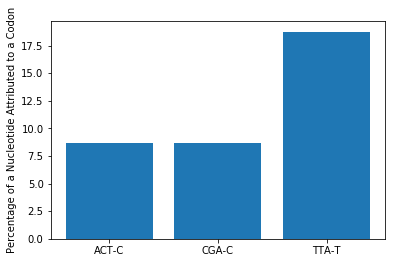

In [25]:
import matplotlib.pyplot as plt
plt.ylabel('Percentage of a Nucleotide Attributed to a Codon')
plt.bar(['TTA-T','CGA-C','ACT-C'],[T_total_TTA_percent,C_total_CGA_percent,C_total_ACT_percent])
plt.show()


Note: in the above plot, the x axes labels are written in a way meant to signify the relationship between the codon and the nucleotide in question; the "-" after the three character sequence marks the nucleotide that we are analyzing. 

# Function for calculating the percentage of total codons that can be attributed to a specific codon (e.g. for a total of 33 codons in our sample DNA string, the percentage codons attributed to TTA is 9.375)

In [26]:
def codon_ratio(codon_instances, total_codons):
    codon_percentage = codon_instances / total_codons
    return codon_percentage 

In [27]:
TTA_percentage = codon_ratio(TTA, number_codons)*100
CGA_percentage = codon_ratio(CGA, number_codons)*100
ACT_percentage = codon_ratio(ACT, number_codons)*100


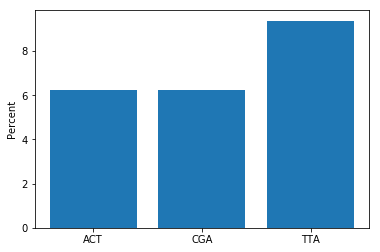

In [28]:
plt.ylabel('Percent')
plt.bar(['TTA','CGA','ACT'],[TTA_percentage, CGA_percentage, ACT_percentage])
plt.show()

# Function for determining how much one of the four nucleotides contributes to the total length of the DNA strand 


In [29]:

def nucleotide_percentizer(DNA_length, nucleotide_instances):
    nucleotide_percentage = (nucleotide_instances / DNA_length) * 100
    return nucleotide_percentage 

In [30]:
T_percentage = nucleotide_percentizer(length,lengthT)
A_percentage = nucleotide_percentizer(length,lengthA)
C_percentage = nucleotide_percentizer(length,lengthC)
G_percentage = nucleotide_percentizer(length,lengthG)

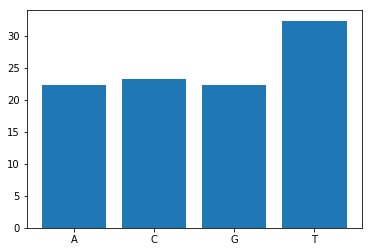

In [31]:
plt.bar(['T','A','C','G'],[T_percentage,A_percentage,C_percentage,G_percentage])
plt.show()

Lastly, the following provides a function that enables one to plot how much a given nucleotide from one codon contributes to the overall length of the entire DNA strand

In [32]:
def nucleo_codon_composition(X_total_XXX_percent, X_percentage):
    X_percent_from_codon = (X_total_XXX_percent/100) * X_percentage
    return X_percent_from_codon 

In [33]:
T_percent_from_TTA = nucleo_codon_composition(T_total_TTA_percent, T_percentage)
C_percent_from_CGA = nucleo_codon_composition(C_total_CGA_percent, C_percentage)
C_percent_from_ACT = nucleo_codon_composition(C_total_ACT_percent, C_percentage)

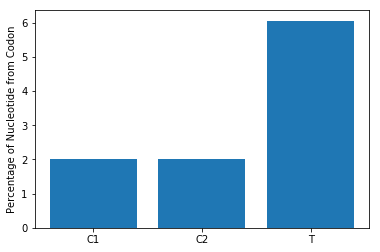

In [34]:
plt.ylabel('Percentage of Nucleotide from Codon')
plt.bar(['T','C1','C2'],[T_percent_from_TTA,C_percent_from_CGA,C_percent_from_ACT])
plt.show()